### CM3400 Demo for Topic 08 Lecture 15 and 16 - Clustering
 Coding demo on clustering using Python for CM3400 Intrioduction to Data Science with Python

In [2]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### Use seaborn data as an example.
df = seaborn.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
### imagine however we did not know the species. 
## Would clustering identify that there were different flower types?
## remove the species column, but keep a copy for comparing to clusters later 

species = df["species"]

## remove the species column 
df = df.drop(columns = "species")
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
## load the function we need to to KMeans clustering

from sklearn.cluster import KMeans

## We have to select the number of clusters to form. (we know this is 3, as there are 3 flower species in iris)
kmeans = KMeans(n_clusters = 3)

## fit the model
clusters = kmeans.fit(df)

## get the vector of cluster labels it has assigned
cluster_labels = clusters.predict(df)

cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

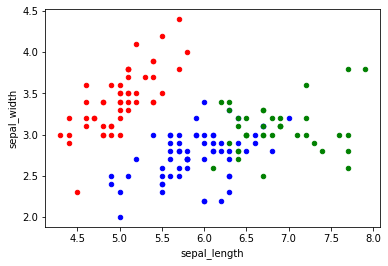

In [12]:
### In lecture I had assumed that pandas scatter could not handle categorical variable for the dot colour
## so I had suggested this complicated display would be needed

fig, ax = plt.subplots()
df[cluster_labels == 0].plot.scatter(x = 'sepal_length', y = 'sepal_width', color = "red", ax = ax)
df[cluster_labels == 1].plot.scatter(x = 'sepal_length', y = 'sepal_width', color = "blue", ax = ax)
df[cluster_labels == 2].plot.scatter(x = 'sepal_length', y = 'sepal_width', color = "green", ax = ax)
df[cluster_labels == 3].plot.scatter(x = 'sepal_length', y = 'sepal_width', color = "purple", ax = ax)
plt.show()

check cluster label types int32


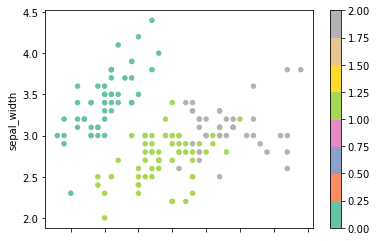

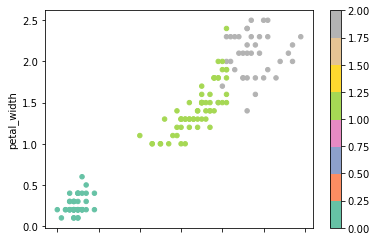

In [13]:
## However cluster_labels are created as integers
print("check cluster label types", cluster_labels.dtype)

## so in fact a pandas scatter plot will work just fine

## see https://matplotlib.org/stable/gallery/color/colormap_reference.html for a list of color maps
df.plot.scatter(x = 'sepal_length', y = 'sepal_width', c = cluster_labels, cmap = 'Set2')
plt.show()

## see https://matplotlib.org/stable/gallery/color/colormap_reference.html for a list of color maps
df.plot.scatter(x = 'petal_length', y = 'petal_width', c = cluster_labels, cmap = 'Set2')
plt.show()

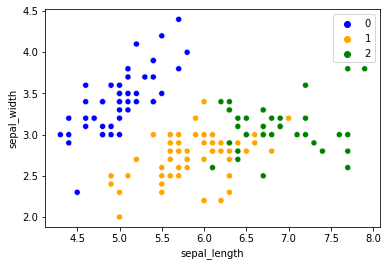

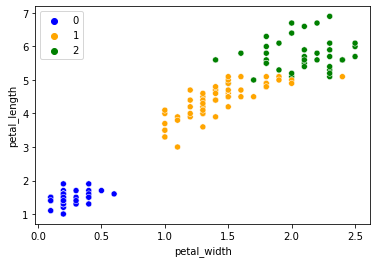

In [14]:
## But seaborn scatterplot is still nicer I think, 
## set hue parameter to the cluster_labels, an we can easily pick our own colours using the pallete parameter

seaborn.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, 
                    hue = cluster_labels, palette = ['blue','orange','green'])
plt.show()

seaborn.scatterplot(x = 'petal_width', y = 'petal_length', data = df, 
                    hue = cluster_labels, palette = ['blue','orange','green'])
plt.show()

In [15]:
## lets compare the clusters to the original species calculation
pd.crosstab(species, cluster_labels)

col_0,0,1,2
species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [16]:
## To investigate different numbers of clusters plot inertia (the within cluster sum of square distances)

inertias = []        ## vector to hold the inertia values

K = range(2, 21)     ## pick a range of cluster numbers to test, and loop through them
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(df)
    cluster_labels = clusters.predict(df)
    
    inertias.append(clusterer.inertia_)

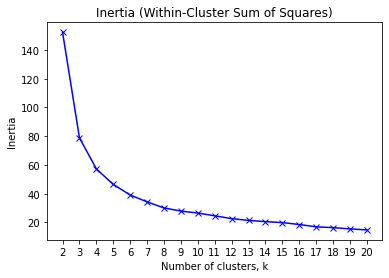

In [18]:
## To investigate different numbers of clusters plot inertia (the within cluster sum of square distances)

from sklearn.metrics import silhouette_samples, silhouette_score
inertias = []
sil = []
##mapping1 = {}
K = range(2, 21)
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(df)
    cluster_labels = clusters.predict(df)
    
    inertias.append(clusterer.inertia_)
    avg_score = silhouette_score(df, labels = cluster_labels)
    sil.append(avg_score)

## Then plot the elbow curve
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia (Within-Cluster Sum of Squares)')
plt.show()

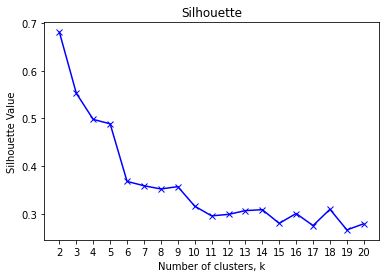

In [19]:
## We could also investigate the average silhouette values (a measure of cohesion and separation)

from sklearn.metrics import silhouette_samples, silhouette_score
silhouette = []
K = range(2, 21)
 
for k in K:
    clusterer = KMeans(n_clusters=k)
    clusters = clusterer.fit(df)
    cluster_labels = clusters.predict(df)
    
    avg_score = silhouette_score(df, labels = cluster_labels)
    silhouette.append(avg_score)

## Then plot the averge silhouette scores against cluster size
plt.plot(K, silhouette, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Value')
plt.title('Silhouette')
plt.show()

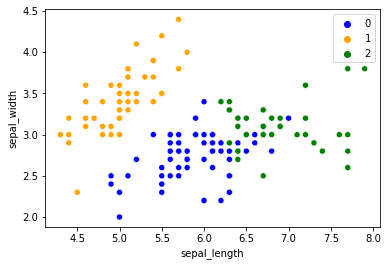

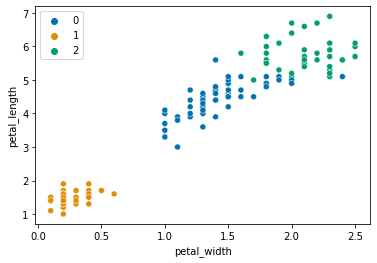

In [21]:
from sklearn.cluster import AgglomerativeClustering

aggcluster = AgglomerativeClustering(n_clusters = 3)


aggModel = aggcluster.fit(df)

cluster_labels = aggModel.labels_

seaborn.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, 
                    hue = cluster_labels, palette = ['blue','orange','green'])
plt.show()

seaborn.scatterplot(x = 'petal_width', y = 'petal_length', data = df, 
hue = cluster_labels, palette = 'colorblind')
plt.show()

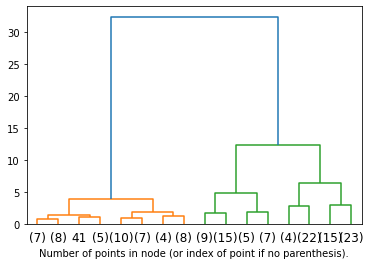

In [23]:
from scipy.cluster.hierarchy import dendrogram

aggcluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

aggModel2 = aggcluster.fit(df)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(aggModel2, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()